#### <center>stroke<center> 

#### INTRODUCTION

In [1]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
import seaborn as sea
import warnings
warnings.filterwarnings("ignore")

#### Loading Dataset

In [2]:
df = pd.read_csv("dataset.csv")

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


#### General Data Preprocessing

In [3]:
df = df.drop(['id'], axis=1)
df = df.drop(['smoking_status'], axis=1)
df = df.drop(['work_type'], axis=1)
df = df.drop(['ever_married'], axis=1)
df = df.drop(['Residence_type'], axis=1)

df.head() # observe the head of the dataset

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,Male,3.0,0,0,95.12,18.0,0
1,Male,58.0,1,0,87.96,39.2,0
2,Female,8.0,0,0,110.89,17.6,0
3,Female,70.0,0,0,69.04,35.9,0
4,Male,14.0,0,0,161.28,19.1,0


In [4]:
df = df.dropna() # drop Na
df = pd.get_dummies(df, drop_first = True)
df =  df.drop(['gender_Other'], axis=1)
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male
0,3.0,0,0,95.12,18.0,0,1
1,58.0,1,0,87.96,39.2,0,1
2,8.0,0,0,110.89,17.6,0,0
3,70.0,0,0,69.04,35.9,0,0
4,14.0,0,0,161.28,19.1,0,1
...,...,...,...,...,...,...,...
43395,10.0,0,0,58.64,20.4,0,0
43396,56.0,0,0,213.61,55.4,0,0
43397,82.0,1,0,91.94,28.9,0,0
43398,40.0,0,0,99.16,33.2,0,1


#### Data Exploration

0    41295
1      643
Name: stroke, dtype: int64


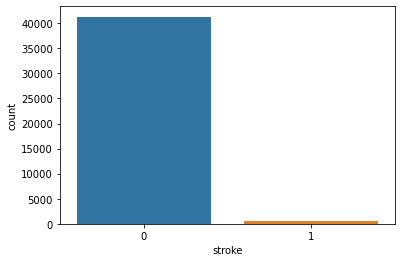

In [5]:
print(df.stroke.value_counts()) # stroke value and find the precentage
sea.countplot(df.stroke)

#### Data split

0    33039
1      511
Name: stroke, dtype: int64

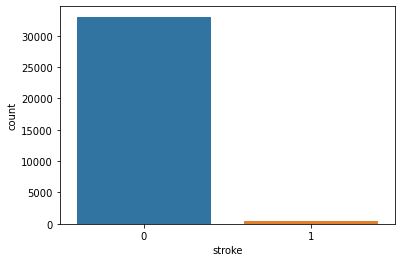

In [6]:
np.random.seed(0)
trainDF, testDF = train_test_split(df, test_size=0.2, random_state=100)# Split the dataset
trainX = trainDF.drop(columns = 'stroke')
trainY = trainDF['stroke']
sea.countplot(trainDF.stroke)
trainDF.stroke.value_counts()

#### Orginal 

In [7]:
def method(X_train,y_train,k):
    lg=LogisticRegression(random_state=0).fit(X_train, y_train)
    knn=KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    #gb = GaussianNB().fit(X_train, y_train)
    rfc=RandomForestClassifier(max_depth=2, random_state=0).fit(X_train, y_train)
    lda = LinearDiscriminantAnalysis().fit(X_train, y_train)
    methods = lg,knn,rfc,lda
    list_score = []
    precision_list=[]
    recall_score = []
    keys_list = "lg", "lda", "knn", "rfc"
    for model in methods:
        model_pred = model.predict(testDF.drop(columns = 'stroke'))
        score = round(model.score(testDF.drop(columns = 'stroke'), testDF.stroke)*100,4)
        list_score.append(score)
        cf = confusion_matrix(testDF.stroke, model_pred)
        precision = precision_score(testDF.stroke,model_pred)
        precision_list.append(precision)
        
        #if cf[1,1]
        recall = cf[1,1] / (cf[1,1] + cf[1,0])
        recall_score.append(recall)
        
        plt.figure(figsize=(9,9))
        sea.heatmap(cf, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
        plt.ylabel('Actual label');
        plt.xlabel('Predicted label');
        all_sample_title = 'Accuracy Score: {0}'.format(score)
        plt.title(all_sample_title, size = 15)
        plt.suptitle(model, y=0.9,fontsize=18)

    plt.figure(figsize=(16,6))
    #plt.yticks(np.arange(np.min(list_score),np.max(list_score),15))
    plt.ylabel("Accuracy %")
    plt.xlabel("Algorithms")
    sea.barplot(x=list(keys_list), y=list(list_score))
    
    
    
    dataframe=pd.DataFrame({'Precision Score':precision_list,'Recall Score':recall_score})
    pd.set_option("display.max_colwidth",3)
    print(dataframe)
    print(np.mean(list_score))


In [8]:
def select_K(train_X,train_Y):

    #create a new KNN model
    #create new a knn model
    knn2 = KNeighborsClassifier()
    #create a dictionary of all values we want to test for n_neighbors
    param_grid = {'n_neighbors': np.arange(1, 25)}
    #use gridsearch to test all values for n_neighbors
    knn_gscv = GridSearchCV(knn2, param_grid, cv=10)
    #fit model to data
    knn_gscv.fit(train_X, train_Y)
    return(knn_gscv.best_params_)
    
select_K(trainX,trainY)

{'n_neighbors': 8}

   Precision Score  Recall Score
0  0.000000         0.000000    
1  0.000000         0.000000    
2  0.000000         0.000000    
3  0.123457         0.075758    
98.2445


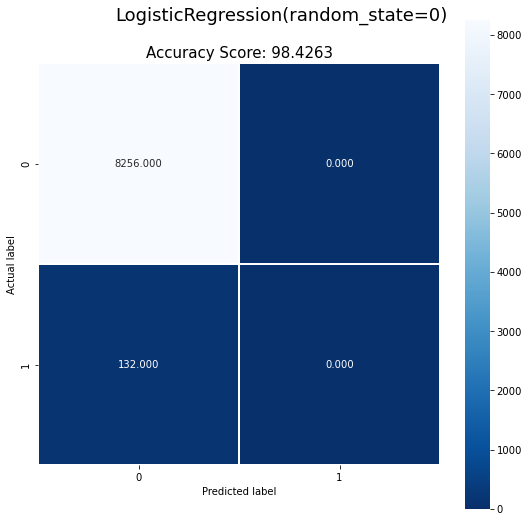

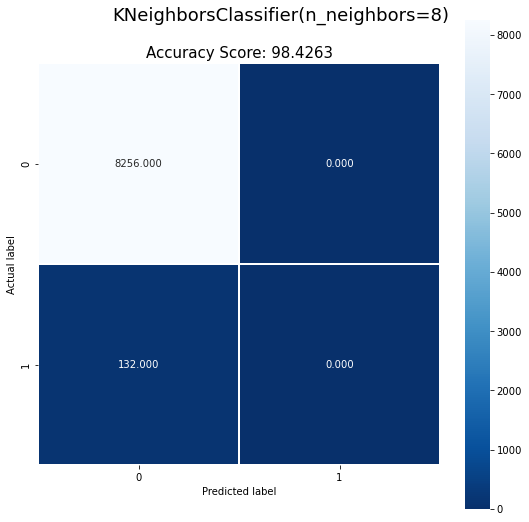

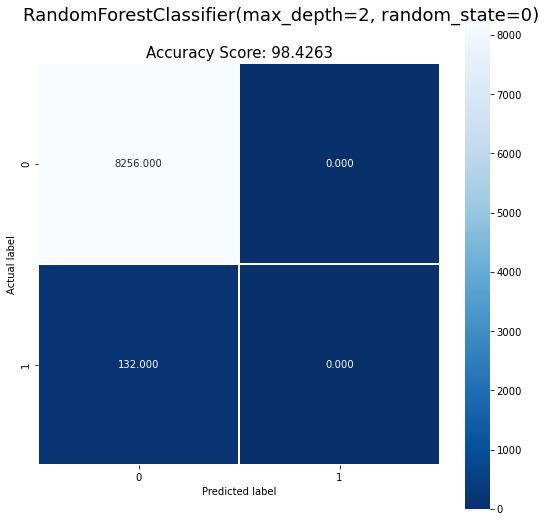

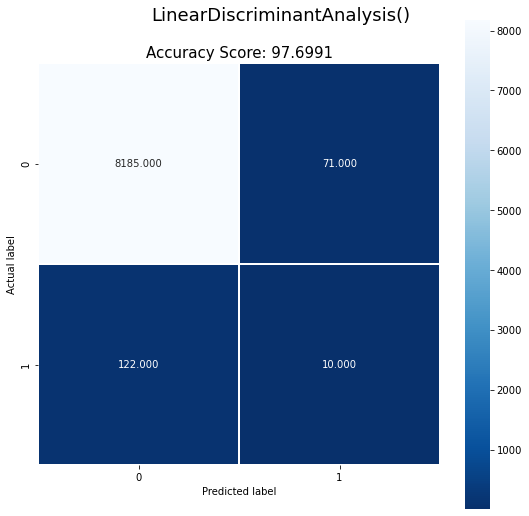

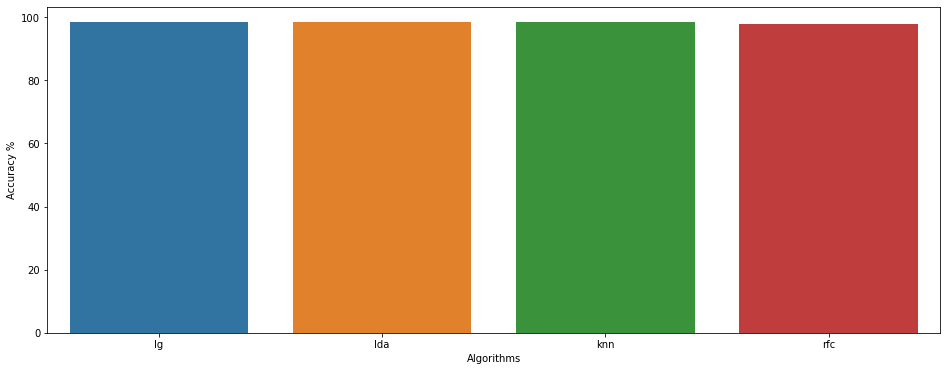

In [9]:
method(trainX,trainY,k=8)

#### Oversampling

In [10]:
Over = RandomOverSampler(random_state=0)

1    33039
0    33039
Name: stroke, dtype: int64

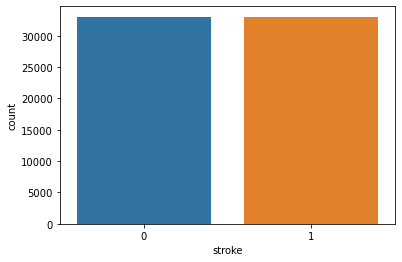

In [11]:
X_resampled, y_resampled = Over.fit_resample(trainX, trainY)
newTrainDF = X_resampled
newTrainDF['stroke'] = y_resampled
newdummiesy = newTrainDF['stroke']
newdummiesx = newTrainDF.drop(columns = 'stroke')
sea.countplot(newTrainDF.stroke)
newTrainDF.stroke.value_counts()

In [12]:
select_K(newdummiesx,newdummiesy)

{'n_neighbors': 1}

   Precision Score  Recall Score
0  0.049209         0.848485    
1  0.058824         0.053030    
2  0.045261         0.886364    
3  0.047286         0.871212    
78.4275


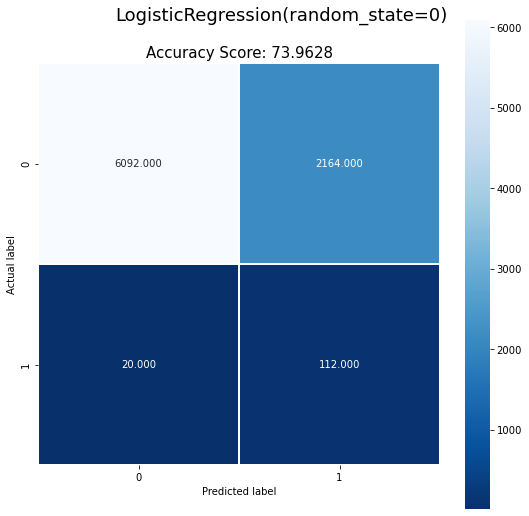

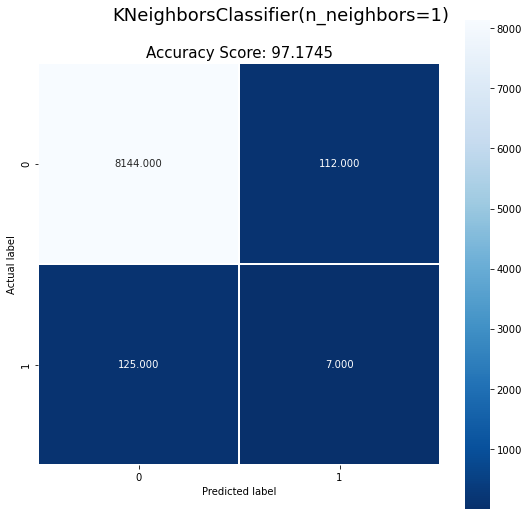

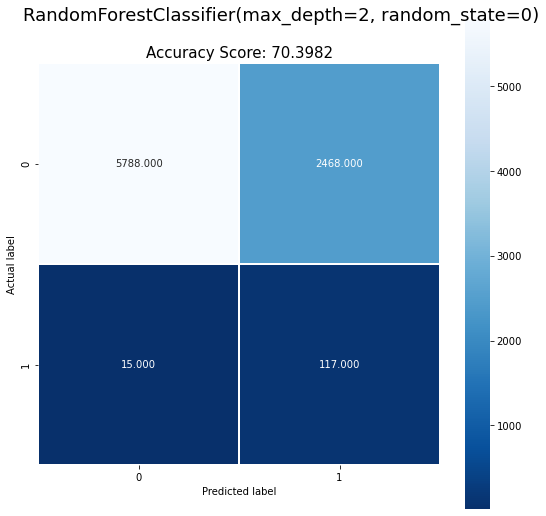

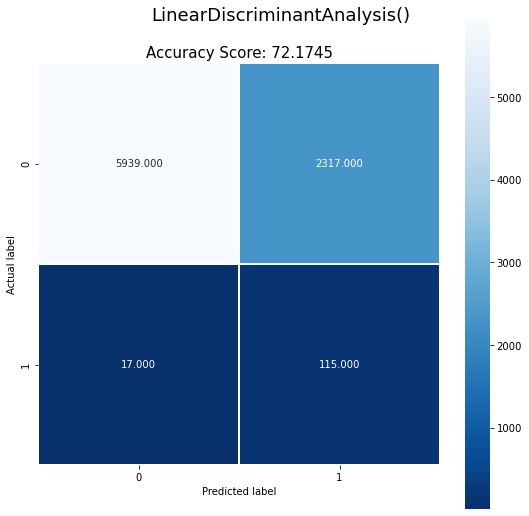

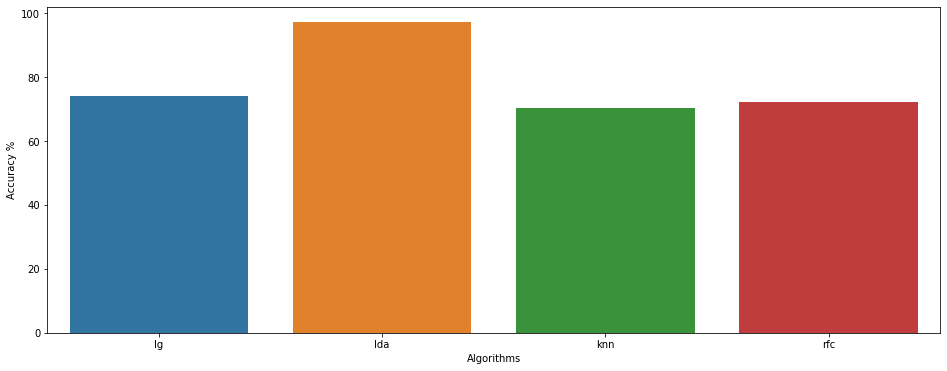

In [13]:
method(newdummiesx,newdummiesy,k=1)
        

#### Undersampling with replacment

1    511
0    511
Name: stroke, dtype: int64


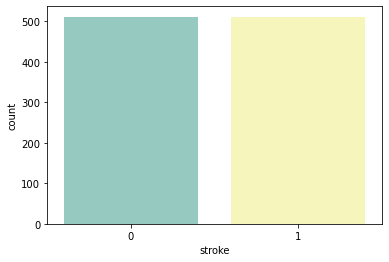

In [14]:
cc = RandomUnderSampler(random_state=0,replacement=True)
X_resampled_U, y_resampled_U = cc.fit_resample(trainX, trainY)
print(y_resampled_U.value_counts())
sea.countplot(y_resampled_U,palette="Set3")


In [15]:
undTrainDF_rep = X_resampled_U
undTrainDF_rep['stroke'] = y_resampled_U
unddummiesy_rep = undTrainDF_rep['stroke']
unddummiesx_rep = undTrainDF_rep.drop(columns = 'stroke')

In [16]:
select_K(unddummiesx_rep,unddummiesy_rep)

{'n_neighbors': 23}

   Precision Score  Recall Score
0  0.049956         0.863636    
1  0.044521         0.886364    
2  0.043605         0.909091    
3  0.048637         0.878788    
71.265525


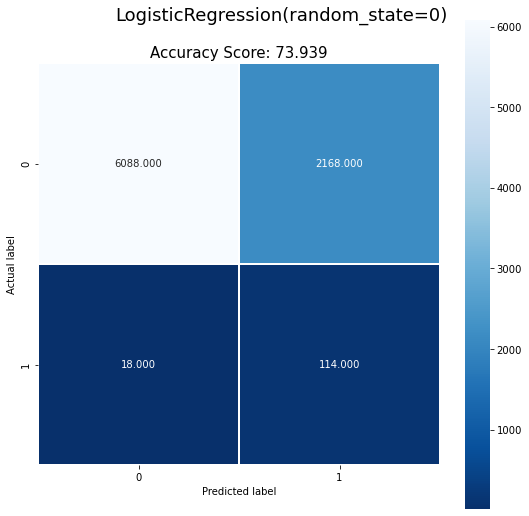

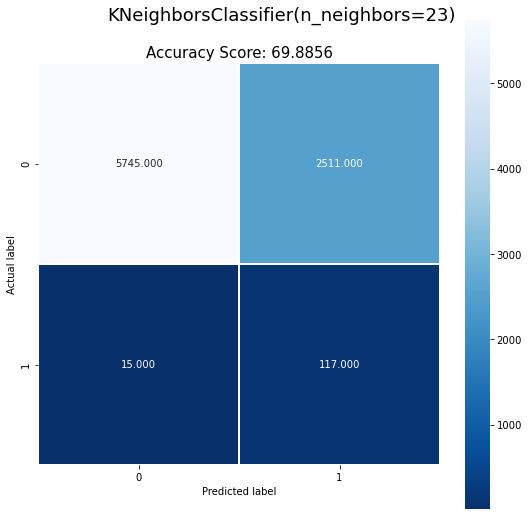

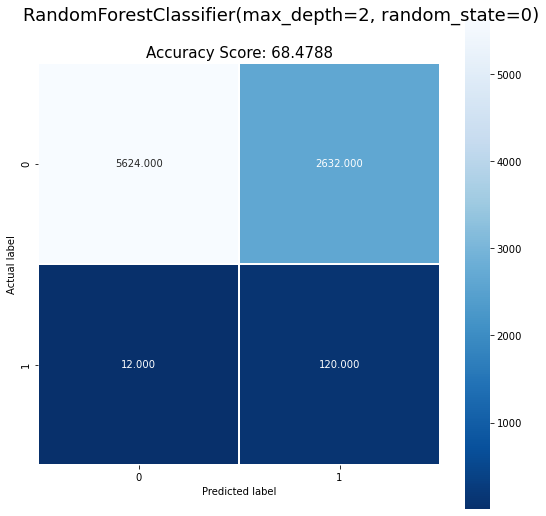

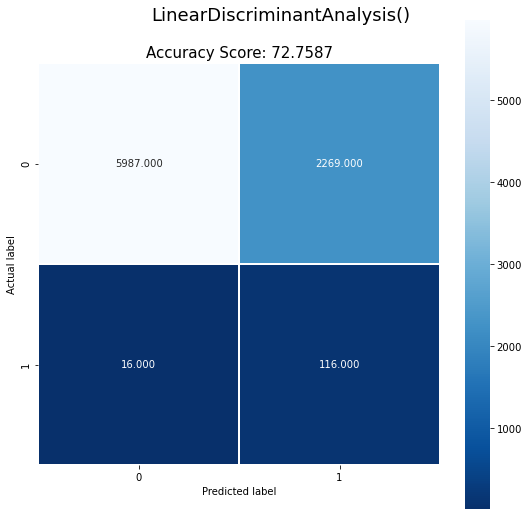

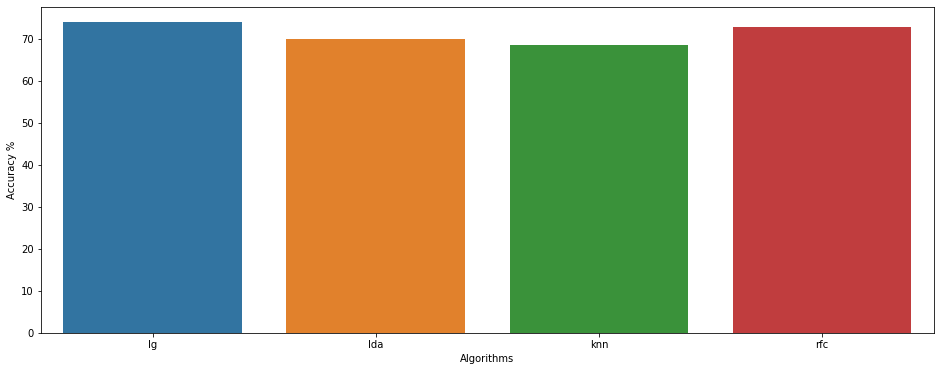

In [17]:
method(unddummiesx_rep,unddummiesy_rep,k=23)


#### Smote

1    33039
0    33039
Name: stroke, dtype: int64


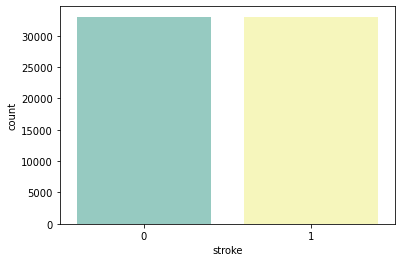

In [18]:
smote = SMOTE()
X_resampled_U, y_resampled_U = smote.fit_resample(trainX, trainY)
print(y_resampled_U.value_counts())
sea.countplot(y_resampled_U,palette="Set3")

In [19]:
SmoteTrainDF = X_resampled_U
SmoteTrainDF['stroke'] = y_resampled_U
SmoteTrainDFy = SmoteTrainDF['stroke']
SmoteTrainDFx = SmoteTrainDF.drop(columns = 'stroke')


In [20]:
select_K(SmoteTrainDFx,SmoteTrainDFy)

{'n_neighbors': 1}

   Precision Score  Recall Score
0  0.048598         0.787879    
1  0.043668         0.227273    
2  0.047135         0.878788    
3  0.047109         0.833333    
77.852275


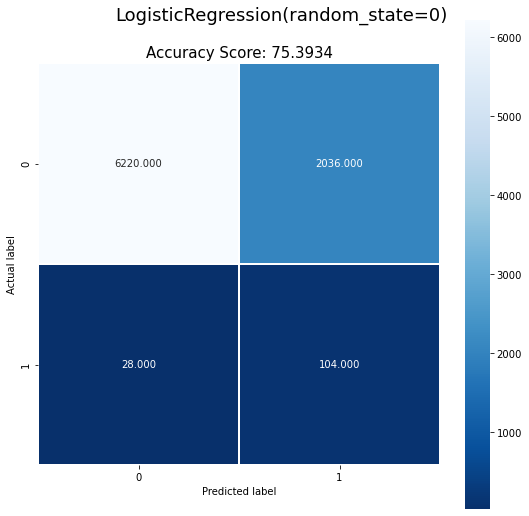

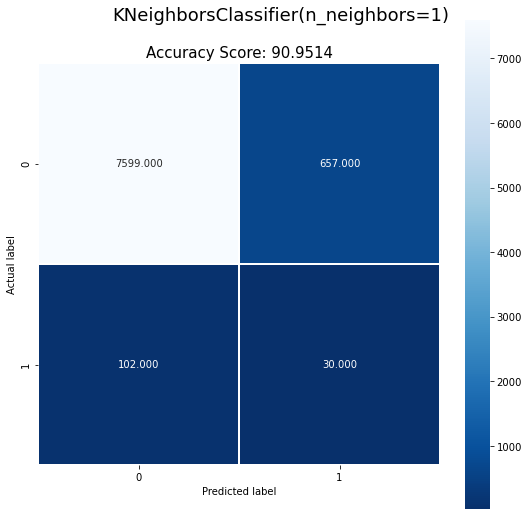

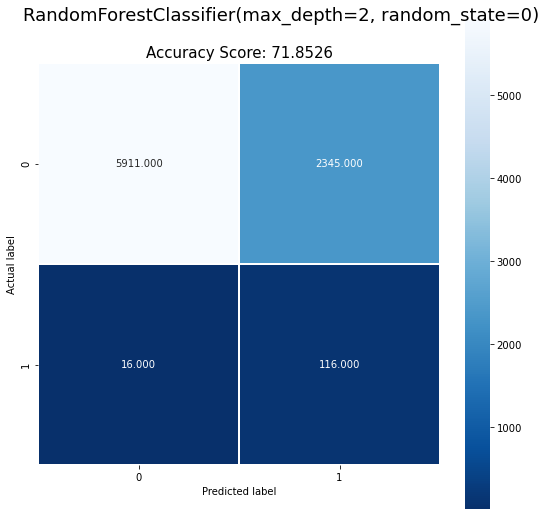

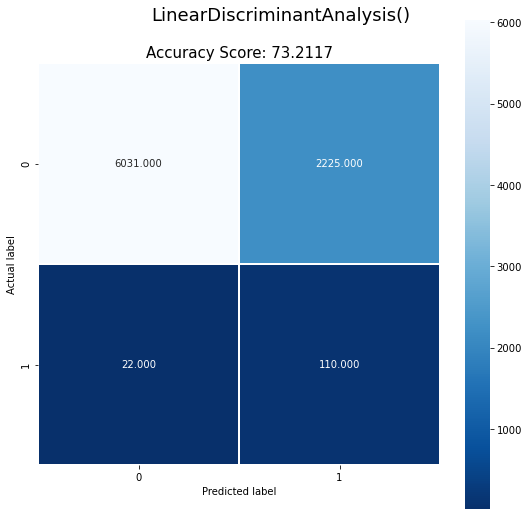

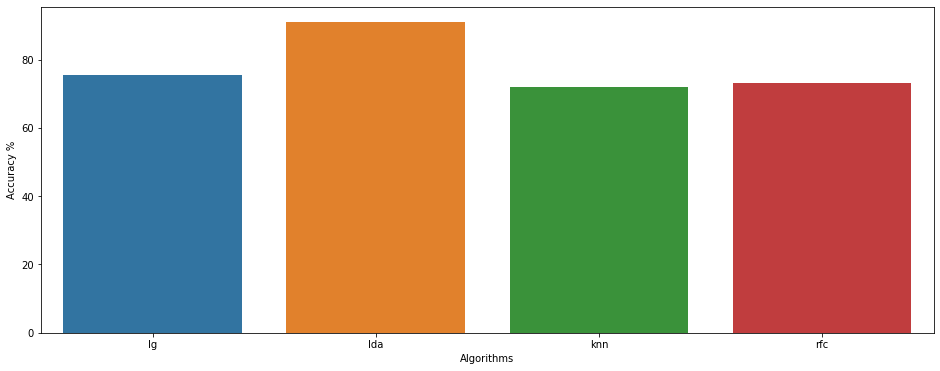

In [21]:
method(SmoteTrainDFx,SmoteTrainDFy,k=1)